In [2]:
!pip install numpy pandas matplotlib seaborn scikit-learn

     |████████████████████████████████| 19.5 MB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 13.1 MB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 8.3 MB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 13.5 MB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 321 kB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 9.9 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 347 kB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 14.2 MB/s eta 0:00:01
     |████████████████████████████████| 38.6 MB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 10.4 MB/s eta 0:00:01


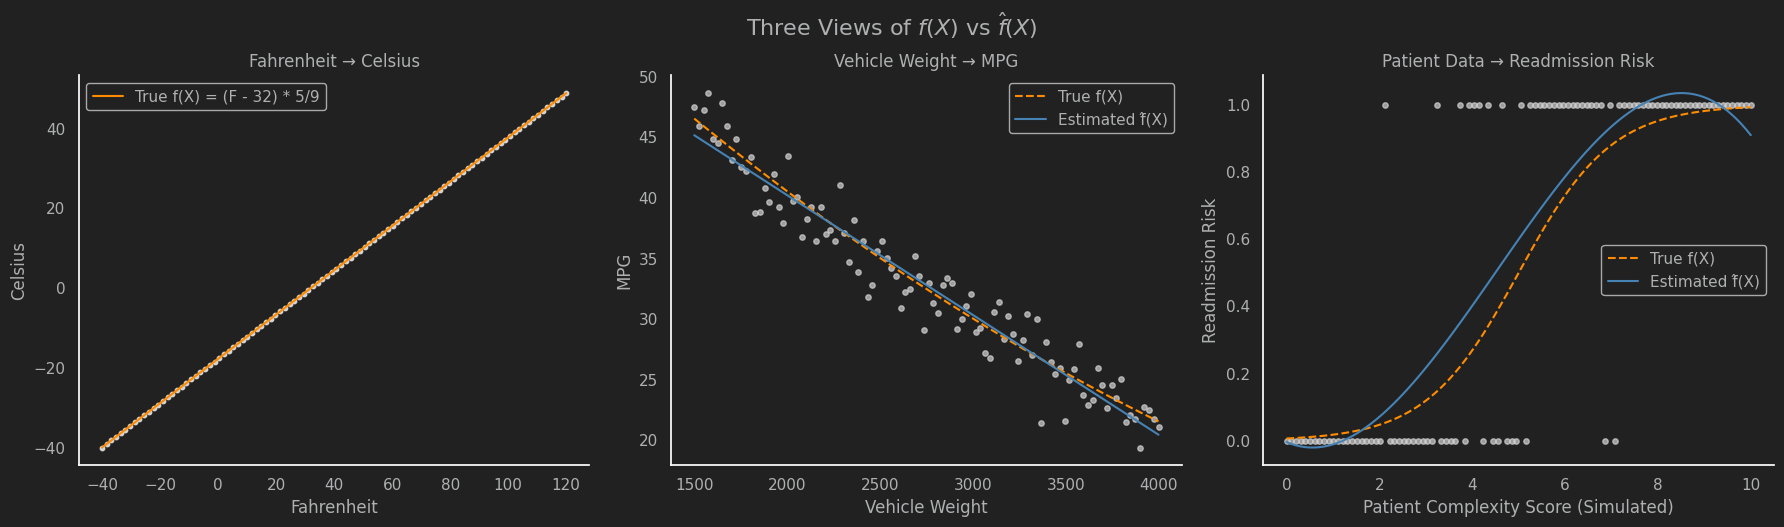

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Set style
# sns.set_theme(style="whitegrid")
sns.set(rc={'axes.facecolor':'#212121',
            'axes.labelcolor': '#afb0b1',
            'figure.facecolor':'#212121',
            'grid.color':'None',
            'text.color': '#afb0b1',
            'xtick.color': '#afb0b1',
            'ytick.color': '#afb0b1',})


# Create figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
titles = ["Fahrenheit → Celsius", "Vehicle Weight → MPG", "Patient Data → Readmission Risk"]

sns.despine(fig=fig, ax=axes, top=True, right=True)

# 1. Fahrenheit → Celsius (perfect linear relationship)
F = np.linspace(-40, 120, 100)
C = (F - 32) * 5/9
axes[0].plot(F, C, color='darkorange', label='True f(X) = (F - 32) * 5/9')
axes[0].scatter(F, C, color='lightgrey', s=10)
axes[0].set_title(titles[0])
axes[0].set_xlabel("Fahrenheit")
axes[0].set_ylabel("Celsius")
axes[0].legend()

# 2. Vehicle Weight → MPG (true function is curved, estimate is linear)
np.random.seed(42)
weight = np.linspace(1500, 4000, 100)
true_mpg = 60 - 0.01 * weight + 0.000001 * (weight - 2750) ** 2
noise = np.random.normal(0, 2, size=weight.shape)
observed_mpg = true_mpg + noise

# True function (curved)
axes[1].plot(weight, true_mpg, linestyle='--', color='darkorange', label='True f(X)')

# Estimated function (linear fit)
X_weight = weight.reshape(-1, 1)
y_mpg = observed_mpg
model = LinearRegression()
model.fit(X_weight, y_mpg)
pred_mpg = model.predict(X_weight)
axes[1].plot(weight, pred_mpg, color='steelblue', label='Estimated f̂(X)')

# Observations
axes[1].scatter(weight, observed_mpg, color='lightgrey', alpha=0.7, s=15)
axes[1].set_title(titles[1])
axes[1].set_xlabel("Vehicle Weight")
axes[1].set_ylabel("MPG")
axes[1].legend()

# 3. Patient Data → Readmission Risk (noisy, nonlinear mock data)
np.random.seed(1)
X = np.linspace(0, 10, 100)
true_probs = 1 / (1 + np.exp(-(X - 5)))  # logistic curve
labels = np.random.binomial(1, true_probs)  # simulate classification

# Estimated function (logistic regression style smooth curve)
X_poly = PolynomialFeatures(3).fit_transform(X.reshape(-1, 1))
logistic_model = LinearRegression().fit(X_poly, labels)
pred_probs = logistic_model.predict(X_poly)

axes[2].scatter(X, labels, color='lightgrey', alpha=0.7, s=15)
axes[2].plot(X, true_probs, linestyle='--', color='darkorange', label='True f(X)')
axes[2].plot(X, pred_probs, color='steelblue', label='Estimated f̂(X)')
axes[2].set_title(titles[2])
axes[2].set_xlabel("Patient Complexity Score (Simulated)")
axes[2].set_ylabel("Readmission Risk")
axes[2].legend()

plt.tight_layout()
plt.suptitle("Three Views of $f(X)$ vs $\\hat{f}(X)$", fontsize=16, y=1.05)
plt.savefig("../assets/images/2025-02-28-Why_the_F_does_it_matter_three_views_of_f_of_x_vs_f_hat_of_x.jpg", bbox_inches='tight')
plt.show()
